### Ridge & Lasso Regression

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=load_boston()

In [3]:
data=pd.DataFrame(data.data)

In [7]:
data.head()
data.columns=df.feature_names

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df.target.shape

(506,)

In [67]:
data['price']=df.target

In [68]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [25]:
x=data.iloc[:,:-1]



In [69]:
y=data.iloc[:,-1]

In [70]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [78]:
lr=LinearRegression()
mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5)

In [79]:
mean_mse=np.mean(mse)

In [80]:
mean_mse

-46.85204768202808

### Ridge Regression

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [82]:
ridge=Ridge()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-5,1e-2,1,10,20,30,40,45,55,100]}

In [105]:
ridge_regression=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [106]:
ridge_regression.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 10, 20,
                                   30, 40, 45, 55, 100]},
             scoring='neg_mean_squared_error')

In [107]:
ridge_regression.best_params_

{'alpha': 55}

In [108]:
ridge_regression.best_score_

-38.183015338763035

### Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
lasso=Lasso() 

In [109]:
lasso_regression=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)


In [110]:
lasso_regression.fit(x,y)

C:\Users\Kedar-PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5462.35430557526, tolerance: 4.0699769802197805
  model = cd_fast.enet_coordinate_descent(
C:\Users\Kedar-PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5966.674495871282, tolerance: 4.116634549450549
  model = cd_fast.enet_coordinate_descent(
C:\Users\Kedar-PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5784.084042283203, tolerance: 4.123618057142858
  model = cd_fast.enet_coordinate_descent(
C:\Users\Kedar-PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 10, 20,
                                   30, 40, 45, 55, 100]},
             scoring='neg_mean_squared_error')

In [111]:
lasso_regression.best_params_

{'alpha': 0.01}

In [112]:
lasso_regression.best_score_

-38.94879005207974

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [115]:
prediction_ridge=ridge_regression.predict(x_test)


In [116]:
prediction_lasso=lasso_regression.predict(x_test)

C:\Users\Kedar-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

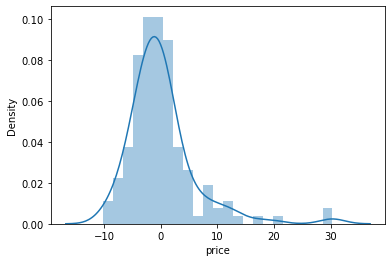

In [117]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)

C:\Users\Kedar-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

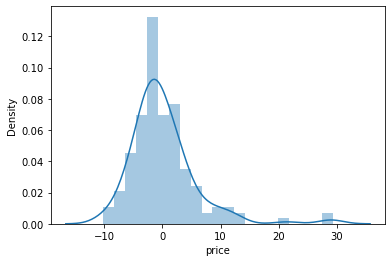

In [118]:
sns.distplot(y_test-prediction_lasso)